In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier # 提供 DT 的模型
from sklearn.model_selection import train_test_split #用來分割資料
from sklearn.metrics import accuracy_score #算分數
from sklearn.tree import export_text #畫決策樹
from sklearn import metrics #觀察混淆矩陣
import matplotlib.pyplot as plt #畫圖
np.random.seed(47)

In [2]:
iris=datasets.load_iris(as_frame=True) #讀出鳶尾花資料集
print("欄位名稱:",iris.feature_names)
print("標籤所有可能的值:",iris.target_names)
X=iris.data
Y=iris.target
print(X.shape)
print(Y.shape)

欄位名稱: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
標籤所有可能的值: ['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [3]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


In [4]:
decision_tree_clf=DecisionTreeClassifier(criterion='entropy')
decision_tree_clf=decision_tree_clf.fit(X_train,Y_train)
feature_names=["花鄂長","花鄂寬","花瓣長","花瓣寬"]
labels=['setosa','versicolor','virginica']
text_tree=export_text(decision_tree_clf,feature_names=list(feature_names))
print(text_tree)

|--- 花瓣寬 <= 0.80
|   |--- class: 0
|--- 花瓣寬 >  0.80
|   |--- 花瓣長 <= 5.05
|   |   |--- 花瓣寬 <= 1.65
|   |   |   |--- class: 1
|   |   |--- 花瓣寬 >  1.65
|   |   |   |--- 花鄂寬 <= 2.90
|   |   |   |   |--- class: 2
|   |   |   |--- 花鄂寬 >  2.90
|   |   |   |   |--- class: 1
|   |--- 花瓣長 >  5.05
|   |   |--- 花瓣寬 <= 1.70
|   |   |   |--- 花鄂長 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- 花鄂長 >  6.05
|   |   |   |   |--- class: 2
|   |   |--- 花瓣寬 >  1.70
|   |   |   |--- class: 2


In [5]:
Y_predict=decision_tree_clf.predict(X_test)
score=accuracy_score(Y_test,Y_predict)
print("準確率:",score)

準確率: 0.94


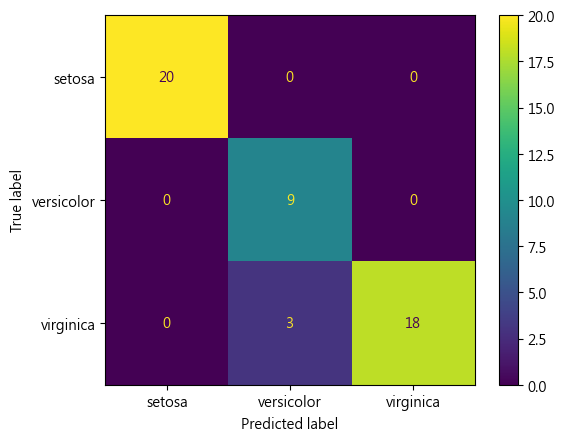

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
confusion_mat=confusion_matrix(Y_test,Y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=iris.target_names)
disp.plot()
plt.show()